# Predictive Model - Mortality of COVID-19

## 1. Data Preparation



In [19]:
import pandas as pd
import numpy as np

In [20]:
df_covid_raw = pd.read_csv("df_covid_modeling.csv",index_col='Patient ID')
df_covid_raw

# df_count = df_covid_raw.apply(lambda x: x.value_counts()).T
# display(df_count)
# df_count.to_csv('df_covid_count.csv')

,Mortality,Age_18_39,Age_40_49,Age_50_59,Age_60_69,Age_70_74,Age_75_99,Gender_Male,BEHAV_AdjustmentStress,BEHAV_Affective_A,...,UROLG_GEN_Kidney,UROLG_GEN_Other_Nos_A,UROLG_GEN_Other_Nos_B,UROLG_GEN_Pers_Fam_Hx_Ds,UROLG_GEN_Screening,UROLG_GEN_Service,UROLG_GEN_Sgn_Symp,UROLG_GEN_Status_A,UROLG_GEN_Status_B,UROLG_GEN_Status2
Patient ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370629,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370630,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370631,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
### undersampling
count0, count1 = df_covid_raw.Mortality.value_counts()
aclass0 = df_covid_raw[df_covid_raw.Mortality==0]
aclass1 = df_covid_raw[df_covid_raw.Mortality==1]
## generate sample of class 0 types matching number of class 1 types
under0 = aclass0.sample(count1)
covid = pd.concat([under0,aclass1],axis=0)
covid.Mortality.value_counts()

1    21270
0    21270
Name: Mortality, dtype: int64

In [5]:
### target variables and predictor variables
y = covid.Mortality
#display(y)
X = covid.loc[:, covid.columns != 'Mortality']
display(X)

,Age_18_39,Age_40_49,Age_50_59,Age_60_69,Age_70_74,Age_75_99,Gender_Male,BEHAV_AdjustmentStress,BEHAV_Affective_A,BEHAV_Affective_B,...,UROLG_GEN_Kidney,UROLG_GEN_Other_Nos_A,UROLG_GEN_Other_Nos_B,UROLG_GEN_Pers_Fam_Hx_Ds,UROLG_GEN_Screening,UROLG_GEN_Service,UROLG_GEN_Sgn_Symp,UROLG_GEN_Status_A,UROLG_GEN_Status_B,UROLG_GEN_Status2
Patient ID,,,,,,,,,,,,,,,,,,,,,
351419,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226747,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235733,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87382,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313327,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370606,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370610,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370621,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
# import basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import Image  
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

# import ML model here
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import model evaluation methods here
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# shut down warning massages
import warnings
warnings.filterwarnings("ignore")

# set random seed
RANDOM_SEED = 42

## 2. Model Comparison and Parameter Optimization

In [6]:
class Model(object):
    def __init__(self, model, random_state=42):
        # class or str are both valid
        self._model_name = model if type(model) is str else model.__name__
        self._model = Pipeline([('scaler', StandardScaler()),
                                ('model', eval(model)() if type(model) is str else model())])
        self._random_state = random_state

    
    def feature_sel(self, model_name, ds):
        if model_name == 'LinearSVC':
            sel = SelectFromModel(LinearSVC(C=0.01, penalty='l1',dual=False))
        elif model_name == 'LogisticRegression':
            sel = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear', dual=False))
        else:
            sel = SelectFromModel(ExtraTreesClassifier(n_estimators=50))
        sel.fit(ds['X_train'], ds['y_train'])
        sel_bool = sel.get_support()
        xtrain = ds['X_train'].iloc[:,sel_bool]
        xtest = ds['X_test'].iloc[:,sel_bool]
        ds_selected = {}
        ds_selected['X_train'] = xtrain
        ds_selected['y_train'] = ds['y_train']
        ds_selected['X_test'] = xtest
        ds_selected['y_test'] = ds['y_test']
        return ds_selected
        

    def grid_search(self, param_grid, ds_selected, display_val=False):
        # 70% for training, 10% for validating
        param_grid = param_grid.copy()
        kflod = StratifiedKFold(n_splits=8, shuffle=True, random_state=self._random_state)
        for key in list(param_grid.keys()): param_grid['model__%s'%key] = param_grid.pop(key)
        try: 
            search = RandomizedSearchCV(self._model, param_grid, n_jobs=-1, cv=kflod, n_iter=40)
            search.fit(ds_selected['X_train'], ds_selected['y_train'])
        except ValueError: 
            search = GridSearchCV(self._model, param_grid, n_jobs=-1, cv=kflod)
            search.fit(ds_selected['X_train'], ds_selected['y_train'])
            
        # record the best model for testing
        self._best_params_ = search.best_params_
        self._best_score = search.best_score_
        self._best_estimator_ = search.best_estimator_
        for key in list(self._best_params_.keys()):
            self._best_params_[key.replace('model__', '')] = self._best_params_.pop(key)
            
        # display validation scores
        if display_val: 
            param_col = ['param_%s'%i for i in list(param_grid.keys())]
            col = ['rank_test_score', 'mean_test_score'] + param_col
            score_table = pd.DataFrame(search.cv_results_)[col].sort_values('rank_test_score')
            for col_name in score_table.columns:
                score_table[col_name.replace('param_model__', '')] = score_table.pop(col_name)
            col = [col_name.replace('param_model__', '') for col_name in col]
            score_table.columns = [[self._model_name+': '+str(self._best_params_)]*len(col), col]
            display(score_table.head(5))
        else:
            print('  %s:'%self._model_name, self._best_params_)
        
    def get_model(self):
        try: return self._best_estimator_
        except NameError: return self._model()
    
    def get_best_params(self):
        try: return self._best_params_
        except NameError: return None
        
    def get_test_score(self, ds):
        # return both model name and its test score
        score_test = round(self._best_estimator_.score(ds['X_test'], ds['y_test']), 3)
        score_train = round(self._best_score, 3)
        name = self._model_name
        best_params = str(self._best_estimator_).replace("'", '')
        return name, score_test, score_train
    
    def get_name(self):
        return self._model_name
    
    def get_confusion_matrix(self, ds):
        #return precision and recall
        y_predict = self._best_estimator_.predict(ds['X_test'])
        name = self._model_name
        precision = round(precision_score(ds['y_test'], y_predict), 3)
        recall = round(recall_score(ds['y_test'], y_predict), 3)
        return name, precision, recall

In [7]:
model_param_dict = {
    'LinearSVC': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    
    'DecisionTreeClassifier': {
        'max_depth': range(1, 5),
        'max_features': [0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
        'max_leaf_nodes': range(2, 10),
        'min_samples_leaf': range(2, 10)
    },
    'RandomForestClassifier': {
        'n_estimators': [20, 40, 60],
        'max_depth': range(1, 5),
        'max_features': [0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
        'max_leaf_nodes': range(2, 10),
        'min_samples_leaf': range(2, 10)
    },
    'GradientBoostingClassifier':{
        'n_estimators':[20, 40, 60], 
        'max_depth':range(1, 6), 
        'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6]
    }
}

In [9]:
def evaluate_model(model_param_dict, ds, display_val=False):
    # sort and display the test score of all models
    score_list = []
    model_dict = {}
    confusion_metrix_list = []
    print('[Best params]')
    for model_name in list(model_param_dict.keys()):
        model = Model(model_name, RANDOM_SEED)
        ds_selected = model.feature_sel(model_name,ds=ds)
        param_grid = model_param_dict[model_name]
        model.grid_search(param_grid, ds_selected, display_val=display_val)
        score_list.append(model.get_test_score(ds_selected))
        confusion_metrix_list.append(model.get_confusion_matrix(ds_selected))
        model_dict[model.get_name()] = model.get_model()
    
    # create the ranking table
    score_df = pd.DataFrame(columns=['Model', 'Score on Testing Set', 'Score on Training Set'], data=score_list)
    score_df.sort_values('Score on Testing Set', inplace=True, ascending=False)
    score_df.reset_index(drop=True, inplace=True)
    
    # create the ranking table based on recall rate
    con_matrix_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall'], data = confusion_metrix_list)
    con_matrix_df.sort_values('Recall', inplace=True, ascending=False)
    con_matrix_df.reset_index(drop=True, inplace=True)
    return score_df, con_matrix_df, model_dict

In [102]:
ds = dict(zip(['X_train', 'X_test', 'y_train', 'y_test'],
                     train_test_split(X, y, test_size=0.2, random_state=42)))


In [93]:
rank, confusion, model_dict = evaluate_model(model_param_dict=model_param_dict, ds=ds, display_val=True)


[Best params]


LinearSVC: {'C': 0.001}                       
          rank_test_score mean_test_score      C
0                       1        0.936854  0.001
1                       1        0.936854   0.01
2                       3        0.936824    0.1
3                       4        0.936765      1
4                       5        0.929625     10

LogisticRegression: {'C': 0.01}                      
                  rank_test_score mean_test_score     C
1                               1        0.940527  0.01
2                               2        0.940497   0.1
3                               3        0.940438     1
4                               3        0.940438    10
5                               3        0.940438   100

DecisionTreeClassifier: {'min_samples_leaf': 4, 'max_leaf_nodes': 8, 'max_features': 0.4, 'max_depth': 4}  \
                                                                                             rank_test_score   
24                                                  1                                                          
13                                                  2                                                          
37                                                  3                                                          
4                                                   4                                                          
5                                                   5                                                          

                                                                           
   mean_test_score max_depth max_features max_leaf_nodes min_samples_leaf  
24        0.873972         4          0.4              8                4  
13        0.842119         3          0.4              5                9  
37        0.838152         4          0.2              8                4  
4         0.836654         3          0.3              4                2  
5         0.829778         2          0.4              8                3

RandomForestClassifier: {'n_estimators': 60, 'min_samples_leaf': 8, 'max_leaf_nodes': 8, 'max_features': 0.08, 'max_depth': 4}  \
                                                                                                                  rank_test_score   
26                                                  1                                                                               
0                                                   2                                                                               
30                                                  3                                                                               
13                                                  4                                                                               
25                                                  5                                                                               

                                                                       \
   mean_test_score n_estimators max_depth max_features max_leaf_nodes   
26        0.910349           60         4         0.08              8   
0         0.910026           60         3         0.08              8   
30        0.907822           60         4         0.05              3   
13        0.906588           40         4         0.08              6   
25        0.906382           60         3         0.01              9   

                     
   min_samples_leaf  
26                8  
0                 7  
30                6  
13                9  
25                7

GradientBoostingClassifier: {'n_estimators': 60, 'max_depth': 4, 'learning_rate': 0.4}  \
                                                                          rank_test_score   
11                                                  1                                       
30                                                  2                                       
28                                                  3                                       
29                                                  4                                       
21                                                  5                                       

                                                         
   mean_test_score n_estimators max_depth learning_rate  
11        0.928479           60         4           0.4  
30        0.927950           40         4           0.4  
28        0.927862           60         1           0.6  
29        0.927627           60         4           0.3  
21        0.926834           60         4           0.2

In [94]:
confusion

,Model,Precision,Recall
0,LogisticRegression,0.942,0.938
1,LinearSVC,0.941,0.936
2,GradientBoostingClassifier,0.942,0.917
3,RandomForestClassifier,0.913,0.908
4,DecisionTreeClassifier,0.864,0.873


In [95]:
rank

,Model,Score on Testing Set,Score on Training Set
0,LogisticRegression,0.940,0.941
1,LinearSVC,0.939,0.937
2,GradientBoostingClassifier,0.930,0.928
3,RandomForestClassifier,0.910,0.910
4,DecisionTreeClassifier,0.868,0.874


Based on the result above, we choose logisticregression with C=0.01 for further study

## 3. Result Interpretation 

In [11]:
sel = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear', dual=False))
sel.fit(ds['X_train'],ds['y_train'])
sel_bool = sel.get_support()
X_train_sel = ds['X_train'].iloc[:,sel_bool]
X_test_sel = ds['X_test'].iloc[:,sel_bool]
y_train = ds['y_train']
y_test = ds['y_test']

In [12]:
def feature_sort(feature, coef):
    importance = dict(zip(feature, coef))
    importance = dict(sorted(importance.items(), key=lambda x: x[-1], reverse=True))
    return importance

In [13]:
logreg = LogisticRegression(C=0.01, max_iter=2000, solver='lbfgs')
logreg.fit(X_train_sel, y_train)
coef = logreg.coef_[0]
feature = X_train_sel.head()
sorted_feature = feature_sort(feature, coef)

for k, v in sorted_feature.items():
    if v > 0:
        print('{key}: {value:.2f}'.format(key = k, value = v))

CVASC_Cardiac_B: 2.19
ENDOC_MET_Diabetes: 1.44
CVASC_Other_Nos_B: 1.38
CVASC_Heart_Rhythm_A: 1.22
Age_75_99: 1.02
CHEST_Airway_Lungs_A: 1.01
CHEST_Other_Nos_B: 0.88
ENDOC_MET_Metabolic_A: 0.87
CVASC_Cardiac_A: 0.85
CVASC_Other_Nos_A: 0.82
CHEST_Status_A: 0.72
UROLG_GEN_Other_Nos_B: 0.71
CHEST_Other_Nos_A: 0.66
GENRL_UNSP_Other_Nos_B: 0.60
HEMO__LYMPH_Other_Nos: 0.52
CVASC_Arterial_A: 0.50
GENRL_UNSP_Service: 0.50
BEHAV_Substance_Abuse: 0.45
DERMA_Extremity_B: 0.44
CHEST_Airway_Lungs_B: 0.44
CHEST_Pneumonia: 0.43
DERMA_Extremity_A: 0.42
CHEST_Chest_Wall_A: 0.42
ENDOC_MET_Thyroid: 0.37
Gender_Male: 0.37
ENTD__Other_Nos_B: 0.37
MSKLT_Other_Nos_A: 0.32
NEURO_Brain_B: 0.31
BEHAV_Affective_B: 0.30
GENRL_UNSP_Pers_Fam_Hx_Ds: 0.29
Age_70_74: 0.29
GENRL_UNSP_Status: 0.29
DERMA_Other_Nos_B: 0.29
DERMA_Whole_Body_Nos_B: 0.28
CVASC_Venous_B: 0.28
GSTIN_Esophagus_A: 0.27
CVASC_Heart_Rhythm_B: 0.26
HEMO__LYMPH_Anemia: 0.26
GENRL_UNSP_Other_Nos_A: 0.26
CHEST_Uri_B: 0.25
NEURO_Other_Nos_A: 0.25
CHEST_

In [32]:
def func1(k, v):
    if v > 0:
        global feat, coef
        feat = k.split('_',1)[0]
        coef = v
    else:
        pass
    return feat, coef


In [33]:
coef_list = []

for k, v in sorted_feature.items():
    coef_list.append(func1(k,v))
    
coef_df = pd.DataFrame(columns=['Feature', 'coef'], data=coef_list)


In [34]:
print(coef_df)

    Feature      coef
0     CVASC  2.193062
1     ENDOC  1.442556
2     CVASC  1.377343
3     CVASC  1.218048
4       Age  1.018978
..      ...       ...
155   PREGN  0.001018
156   PREGN  0.001018
157   PREGN  0.001018
158   PREGN  0.001018
159   PREGN  0.001018

[160 rows x 2 columns]


In [59]:
grouped = coef_df.groupby('Feature')
agg = grouped['coef'].agg([np.size, np.mean])
agg['weighted_freq'] = agg.apply(lambda x: x['size']*x['mean'], axis=1)


print(agg)

           size      mean  weighted_freq
Feature                                 
Age         2.0  0.653906       1.307812
BEHAV       8.0  0.156734       1.253871
CHEST      15.0  0.371675       5.575130
CVASC      15.0  0.550311       8.254660
DERMA       9.0  0.238604       2.147440
ENDOC       7.0  0.414305       2.900132
ENTD        5.0  0.182176       0.910880
EYE         4.0  0.023492       0.093969
FGENT       8.0  0.045098       0.360785
GENRL      13.0  0.212382       2.760967
GSTIN      14.0  0.100442       1.406187
Gender      1.0  0.367217       0.367217
HEMO        4.0  0.207331       0.829323
MGENT       2.0  0.063337       0.126674
MSKLT      17.0  0.067670       1.150382
NEURO       8.0  0.142295       1.138359
PREGN      17.0  0.001018       0.017308
UROLG      10.0  0.134272       1.342719
Undefined   1.0  0.146143       0.146143


In [92]:
agg_dict = dict(zip(list(agg.index), list(round(agg['mean'],3))))

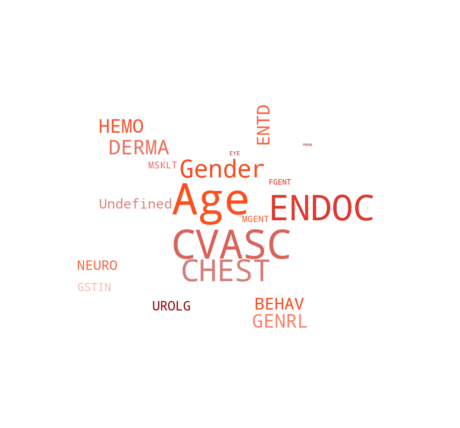

In [101]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

mask = np.array(Image.open("virus.jpg"))
wordcloud = WordCloud(background_color = 'white', mask=mask)
wordcloud.generate_from_frequencies(agg_dict)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[8,8])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

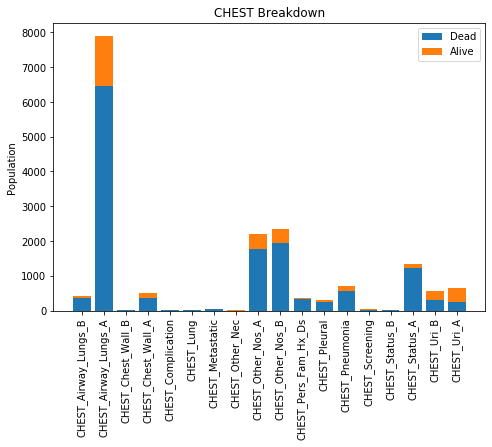

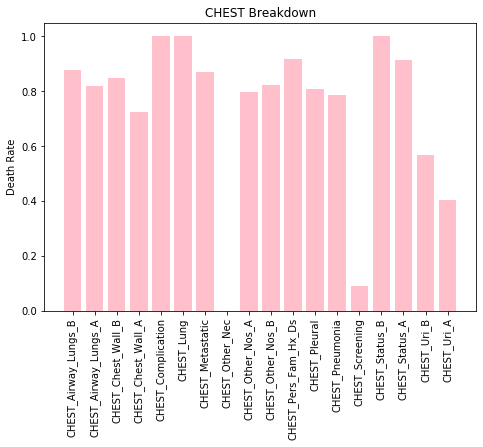

In [22]:
import matplotlib.pyplot as plt

chest_cats = []
deads = []
lives = []

for chest_cat in filter(lambda x:"CHEST" in x, covid.columns.to_list()):
    covid_chest = covid[covid[chest_cat]==1]
    chest_cats.append(chest_cat)
    deads.append(len(covid_chest[covid_chest.Mortality==1]))
    lives.append(len(covid_chest[covid_chest.Mortality==0]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(chest_cats, deads)
ax.bar(chest_cats, lives,bottom=deads)
ax.set_ylabel('Population')
ax.set_title('CHEST Breakdown')
ax.legend(labels=['Dead', 'Alive'])
plt.xticks(rotation='vertical')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mortality = [deads[i]/(deads[i]+lives[i]) for i in range(len(deads))]
ax.bar(chest_cats, mortality, color="pink")
ax.set_ylabel('Death Rate')
ax.set_title('CHEST Breakdown')
plt.xticks(rotation='vertical')
# for i, v in enumerate(mortality):
#     plt.text(i, v-0.05, "{:.2f}%".format(v*100), horizontalalignment ='center', fontsize=6)
plt.show()

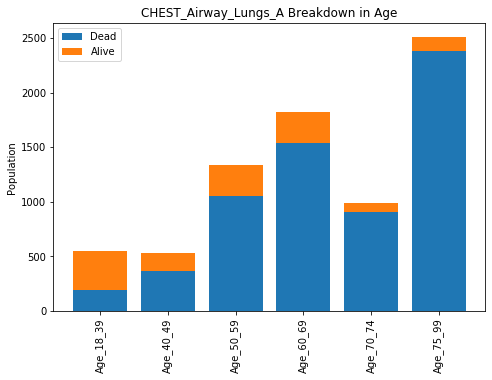

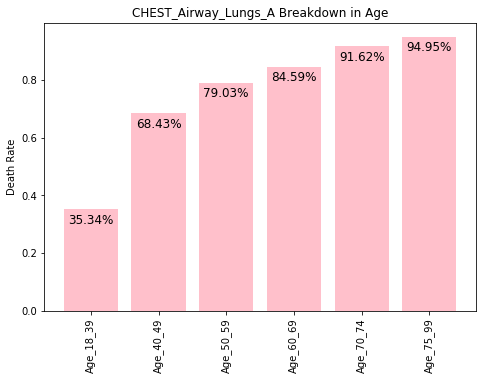

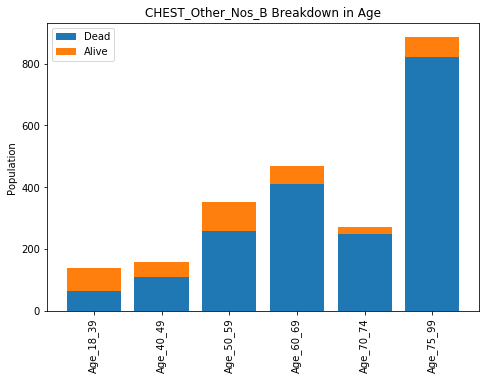

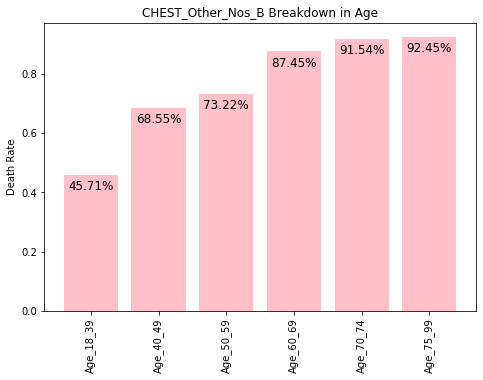

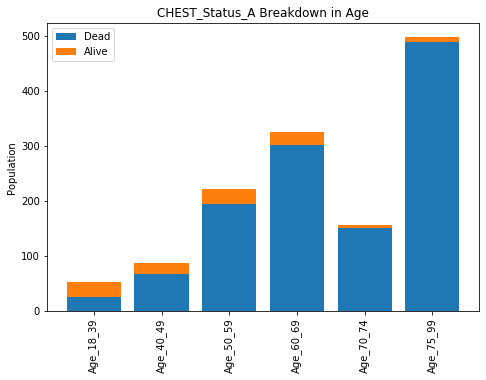

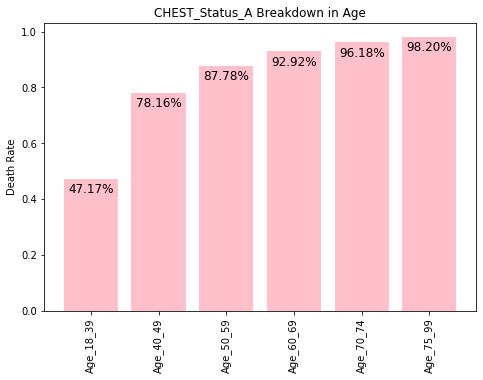

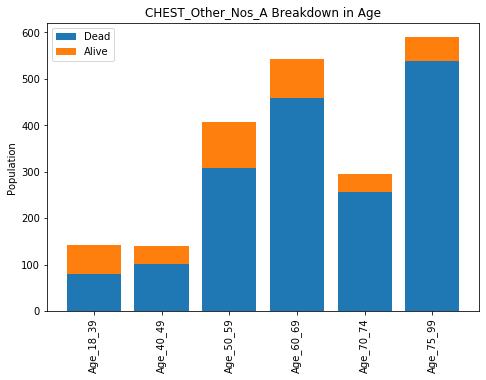

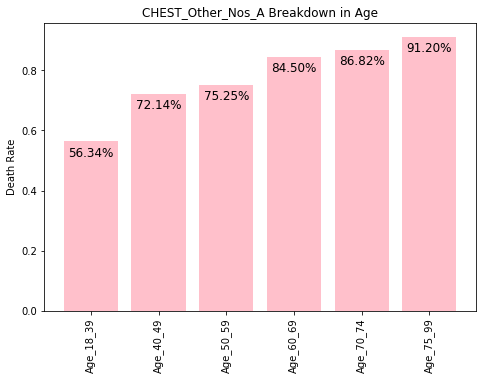

In [23]:
chest_cats = ["CHEST_Airway_Lungs_A", "CHEST_Other_Nos_B", "CHEST_Status_A", "CHEST_Other_Nos_A"]
ages = list(filter(lambda x:"Age" in x, covid.columns.to_list()))
for chest_cat in chest_cats:
    deads = []
    lives = []
    for age in ages:
        covid_chest_age = covid[(covid[chest_cat]==1) & (covid[age]==1)]
        deads.append(len(covid_chest_age[covid_chest_age.Mortality==1]))
        lives.append(len(covid_chest_age[covid_chest_age.Mortality==0]))
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(ages, deads)
    ax.bar(ages, lives,bottom=deads)
    ax.set_ylabel('Population')
    ax.set_title('{} Breakdown in Age'.format(chest_cat))
    ax.legend(labels=['Dead', 'Alive'])
    plt.xticks(rotation='vertical')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    mortality = [deads[i]/(deads[i]+lives[i]) for i in range(len(deads))]
    ax.bar(ages, mortality, color="pink")
    ax.set_ylabel('Death Rate')
    ax.set_title('{} Breakdown in Age'.format(chest_cat))
    plt.xticks(rotation='vertical')
    
    for i, v in enumerate(mortality):
        plt.text(i, v-0.05, "{:.2f}%".format(v*100), horizontalalignment ='center', fontsize=12)
    plt.show()
    

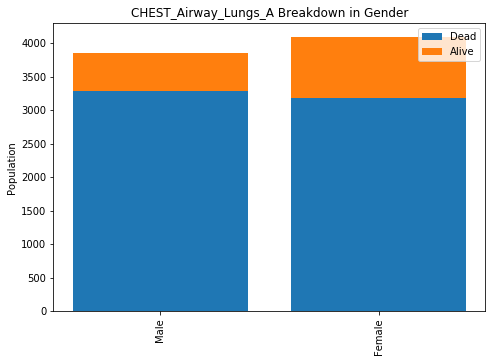

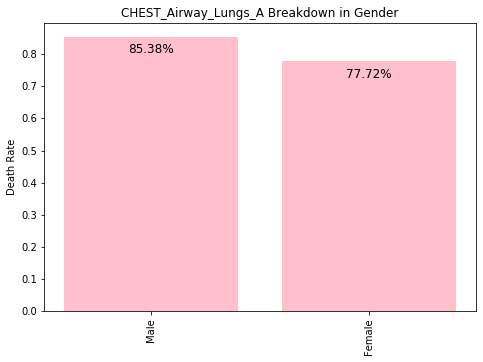

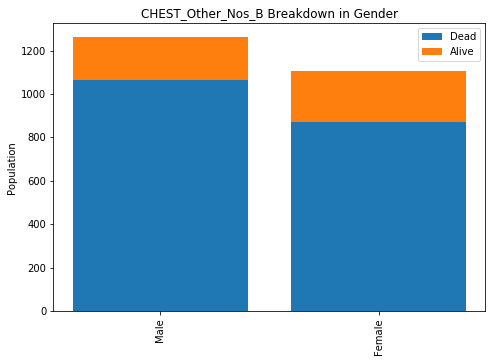

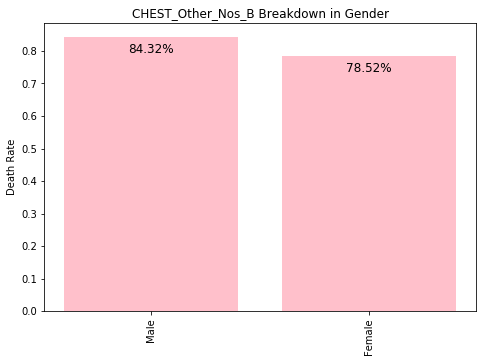

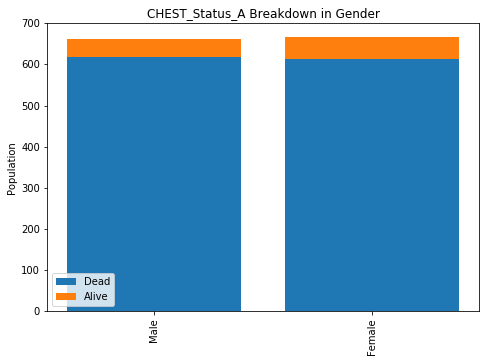

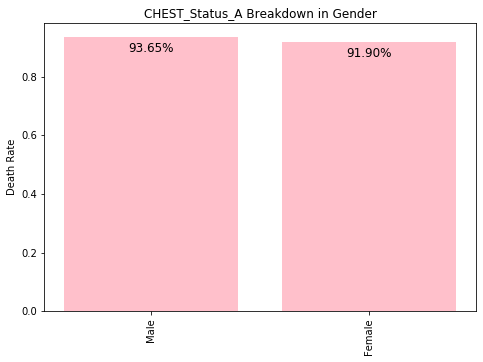

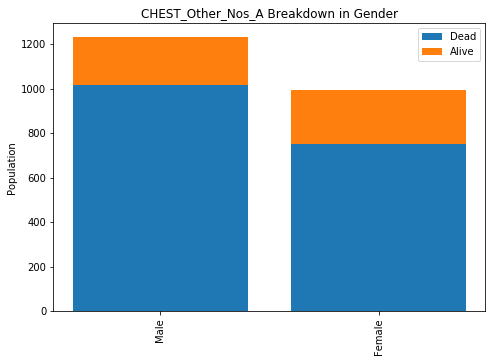

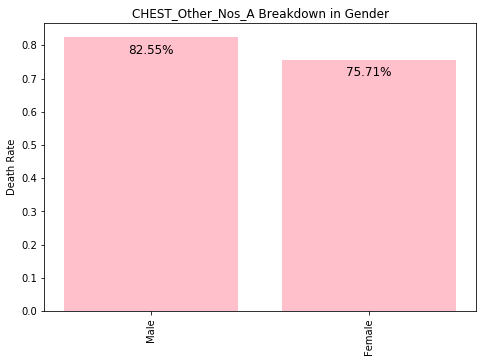

In [6]:
chest_cats = ["CHEST_Airway_Lungs_A", "CHEST_Other_Nos_B", "CHEST_Status_A", "CHEST_Other_Nos_A"]
gender = ["Male", "Female"]
for chest_cat in chest_cats:
    deads = []
    lives = []
    for g in gender:
        gd = 1 if g=="Male" else 0
        covid_chest_gender = covid[(covid[chest_cat]==1) & (covid.Gender_Male==gd)]
        deads.append(len(covid_chest_gender[covid_chest_gender.Mortality==1]))
        lives.append(len(covid_chest_gender[covid_chest_gender.Mortality==0]))
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(gender, deads)
    ax.bar(gender, lives,bottom=deads)
    ax.set_ylabel('Population')
    ax.set_title('{} Breakdown in Gender'.format(chest_cat))
    ax.legend(labels=['Dead', 'Alive'])
    plt.xticks(rotation='vertical')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    mortality = [deads[i]/(deads[i]+lives[i]) for i in range(len(deads))]
    ax.bar(gender, mortality, color="pink")
    ax.set_ylabel('Death Rate')
    ax.set_title('{} Breakdown in Gender'.format(chest_cat))
    plt.xticks(rotation='vertical')
    
    for i, v in enumerate(mortality):
        plt.text(i, v-0.05, "{:.2f}%".format(v*100), horizontalalignment ='center', fontsize=12)
    plt.show()
    